In [261]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




sns.set(style="whitegrid", palette="muted", rc={"figure.figsize": (10, 6)})


### Current datasets

In [42]:
# 126 856
old_1 = pd.read_csv('/Users/igorrudakov/python_projects/portfolio_tests/labour_demand/datasets/last_download_hh.csv')
old_1 = old_1.iloc[:,1:]
old_1 = old_1.drop(columns=['parent_profession_name','parent_profession_id'])
old_1 = old_1.drop_duplicates()
old_1.vacancy_name.count()

126856

In [180]:
old_1[old_1.salary_middle >0].salary_middle.sort_values().head(20)

194592      7.0
42491      30.0
163067     35.0
5335       50.0
180587     55.0
1287       60.0
15984      62.5
187415     70.0
93839      70.0
209565     75.0
195797     77.5
194475     80.0
30059      80.0
191574     80.0
19061      80.0
91026      90.0
168026     90.0
83264      94.0
187778    115.0
35682     120.0
Name: salary_middle, dtype: float64

In [187]:
old_1[ (old_1.salary_middle <120) & (old_1.salary_middle > 0) ].head().T

,1287,5335,15984,19061,30059
vacancy_name,Контент-менеджер,Агент по продаже недвижимости.,Медицинский регистратор на ресепшен,Аналитик данных (удаленно),Консультант финансового отдела (на участок рас...
area_id,1,1,1,1,1
area_name,Москва,Москва,Москва,Москва,Москва
published_at,2023-12-05 12:53:42+03:00,2023-12-06 15:39:33+03:00,2024-01-05 20:25:27+03:00,2023-12-27 13:29:29+03:00,2023-11-30 15:23:02+03:00
created_at,2023-12-05 12:53:42+03:00,2023-12-06 15:39:33+03:00,2024-01-05 20:25:27+03:00,2023-12-27 13:29:29+03:00,2023-11-30 15:23:02+03:00
employer_id,4235377.0,1548790.0,10625610.0,708.0,3973501.0
employer_name,Creative Media,Полиснаб,Поколение Некст,"Фаворит, Международный кадровый центр",Межрегиональная инспекция ФНС России по крупне...
employer_link,https://hh.ru/employer/4235377,https://hh.ru/employer/1548790,https://hh.ru/employer/10625610,https://hh.ru/employer/708,https://hh.ru/employer/3973501
city,1,1,1,1,1
schedule,Полный день,Полный день,Сменный график,Удаленная работа,Полный день


In [37]:
#  chatgpted
feb_7 = pd.read_csv('/Users/igorrudakov/python_projects/portfolio_tests/labour_demand/datasets/last_output_gpt_feb7.csv')
feb_7 = feb_7.iloc[:,2:]
feb_7 = feb_7.drop(columns=['description'])
feb_7 = feb_7.drop_duplicates()
feb_7.vacancy_name.count()

228

In [43]:
#  37k
vacancies_2024_02_20 = pd.read_csv('/Users/igorrudakov/python_projects/portfolio_tests/labour_demand/datasets/vacancies_2024-02-20.csv')
vacancies_2024_02_20 = vacancies_2024_02_20.iloc[:,1:]
vacancies_2024_02_20 = vacancies_2024_02_20.drop(columns=['description'])
vacancies_2024_02_20 = vacancies_2024_02_20.drop_duplicates()
vacancies_2024_02_20.vacancy_name.count()

37985

In [39]:
#  chatgpted
vacancies_2024_01_20 = pd.read_csv('/Users/igorrudakov/python_projects/portfolio_tests/labour_demand/datasets/vacancies_from_hh_2_url.csv')
vacancies_2024_01_20 = vacancies_2024_01_20.iloc[:,1:]
vacancies_2024_01_20 = vacancies_2024_01_20.drop(columns=['description'])
vacancies_2024_01_20 = vacancies_2024_01_20.drop_duplicates()
vacancies_2024_01_20.vacancy_name.count()

362

### Needed datasets for analysis

-- make decile swing plots
-- copypaste the update
-- make some recos

In [44]:
old_1.columns == vacancies_2024_02_20.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [51]:
ttl_df = pd.concat( [old_1,vacancies_2024_02_20], axis=0, ignore_index=True )

In [52]:
ttl_df.head().T

,0,1,2,3,4
vacancy_name,Помощник event-менеджера,Помощник event-менеджера,Сотрудник площадки на Event-мероприятие,Ассистент event менеджера,Стажер в рекламное агентство
area_id,1,1,1,1,1
area_name,Москва,Москва,Москва,Москва,Москва
published_at,2023-12-21 19:23:32+03:00,2023-12-11 13:12:31+03:00,2023-12-04 13:17:43+03:00,2023-12-22 20:08:05+03:00,2023-12-05 13:35:34+03:00
created_at,2023-12-21 19:23:32+03:00,2023-12-11 13:12:31+03:00,2023-12-04 13:17:43+03:00,2023-12-22 20:08:05+03:00,2023-12-05 13:35:34+03:00
employer_id,5430539.0,9336164.0,921398.0,3255597.0,175016.0
employer_name,ПРОФЭКСПЕРТИЗА,Kids Boom (ИП Калмаева Инна Николаевна),ПРО-Интерактив,Литтлс,DIVERSITY
employer_link,https://hh.ru/employer/5430539,https://hh.ru/employer/9336164,https://hh.ru/employer/921398,https://hh.ru/employer/3255597,https://hh.ru/employer/175016
city,1,1,1,1,1
schedule,Полный день,Полный день,Полный день,Сменный график,Полный день


In [172]:
ttl_df[ttl_df.salary_middle == 7].T

,113237
vacancy_name,Портной-закройщик
area_id,1
area_name,Москва
published_at,2023-12-27 10:52:31+03:00
created_at,2023-12-27 10:52:31+03:00
employer_id,9618554.0
employer_name,Indress
employer_link,https://hh.ru/employer/9618554
city,1
schedule,Полный день


In [278]:
full_time_day_w_salary = ttl_df[ (ttl_df.salary_middle > 0)\
                                & (ttl_df.employment == 'Полная занятость')\
                                & (ttl_df.schedule == 'Полный день')\
                                & (ttl_df.currency == 'RUR')\
                                & (ttl_df.salary_middle > 19000)   
                                ]
full_time_day_w_salary = full_time_day_w_salary.sort_values(by='salary_middle', ascending=True)
full_time_day_w_salary['salary_middle'] = full_time_day_w_salary.salary_middle.astype(int)

In [302]:
full_time_day_w_salary.role_name.nunique()

174

In [283]:
just_salary = full_time_day_w_salary[['salary_middle','role_name']] 
decle = just_salary.salary_middle.quantile([0., .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .97, .99, 1])
decle

0.00      20000.0
0.10      55000.0
0.20      65000.0
0.30      73500.0
0.40      80000.0
0.50      90000.0
0.60     100000.0
0.70     120000.0
0.80     140000.0
0.90     175000.0
0.95     210000.0
0.97     250000.0
0.99     350000.0
1.00    5100000.0
Name: salary_middle, dtype: float64

In [303]:
3625109	- 3245128

379981

In [284]:
just_salary['percentile_id'] = decle.searchsorted( just_salary.salary_middle, side='left')
just_salary = just_salary.merge(olist, how='left', left_on='percentile_id', right_on='order_id', copy=False )  
just_salary = just_salary[ just_salary.percentile.isna() == 0]


/var/folders/z8/hdkxtn_15wx2h07f409mskwm0000gn/T/ipykernel_51030/3287620845.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,salary_middle,role_name,percentile_id,percentile,order_id
14,21000,"Уборщица, уборщик",1,0.0,1.0
15,21300,"Уборщица, уборщик",1,0.0,1.0
16,21750,Диспетчер,1,0.0,1.0
17,22000,Охранник,1,0.0,1.0
18,22000,"Уборщица, уборщик",1,0.0,1.0


In [285]:
# Define the array of deciles and the ordered list
ordered_list = list(range(1, len(decle) + 1))

# Create a DataFrame
olist = pd.DataFrame({'percentile': decle, 'order_id': ordered_list})
olist

,percentile,order_id
0.00,20000.0,1
0.10,55000.0,2
0.20,65000.0,3
0.30,73500.0,4
0.40,80000.0,5
0.50,90000.0,6
0.60,100000.0,7
0.70,120000.0,8
0.80,140000.0,9
0.90,175000.0,10


In [286]:
decile_salaries = just_salary.groupby('percentile', as_index=False)\
    .agg(
        mean_salary=('salary_middle', 'mean'),
        job_count=('salary_middle', 'count')
        
    ).astype({'mean_salary':int, 'job_count':int})
decile_salaries


,percentile,mean_salary,job_count
0,0.00,47297,7256
1,0.10,61075,7814
2,0.20,69764,6123
3,0.30,78307,7906
4,0.40,87307,6461
5,0.50,98505,7998
6,0.60,113752,8569
7,0.70,131977,5330
8,0.80,155770,6563
9,0.90,193779,3125


In [287]:
# Define a function to format the y-axis labels
def format_yticks(value, pos):

    return '{:,.0f}'.format(value).replace(',', ' ')

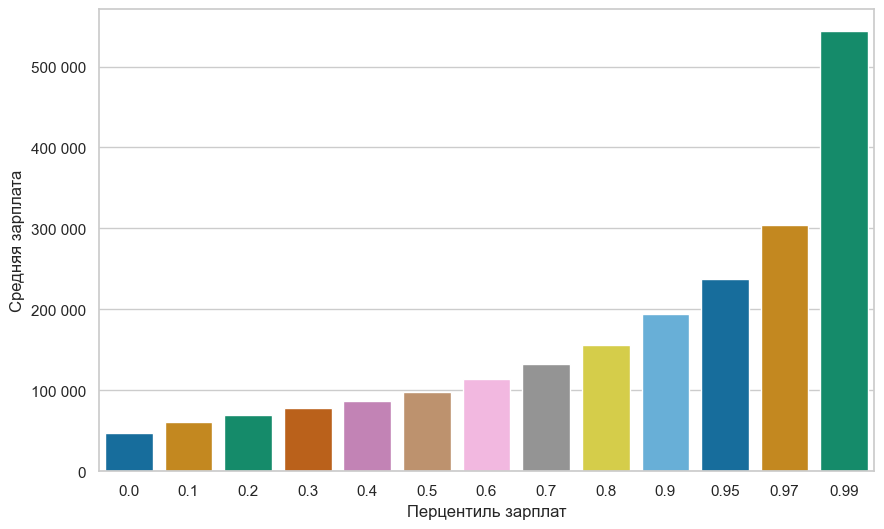

In [288]:
sns.barplot(data=decile_salaries, x='percentile', y='mean_salary',  palette="colorblind" )
ax = plt.gca()

# Set custom axis labels
ax.set_xlabel("Перцентиль зарплат")
ax.set_ylabel("Средняя зарплата")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))



In [291]:
decile_salaries.job_count.sum()

70596

sns.barplot(data=decile_salaries, x='percentile', y='count' )

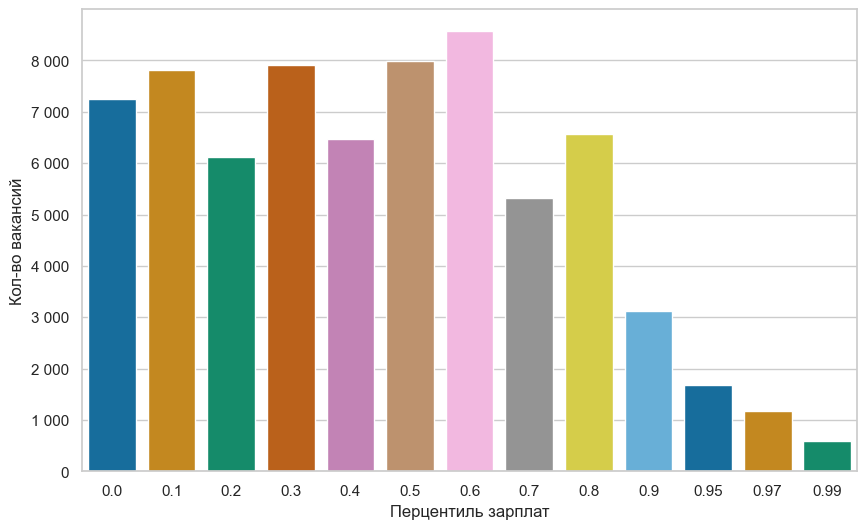

In [289]:

sns.barplot(data=decile_salaries, x='percentile', y='job_count',  palette="colorblind" )
ax1 = plt.gca()

# Set custom axis labels
ax1.set_xlabel("Перцентиль зарплат")
ax1.set_ylabel("Кол-во вакансий")

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))